importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Loading Model

In [19]:
model  = tf.keras.models.load_model('trained_model.keras')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Visualizaing Single Image of Test set

In [5]:
! pip install opencv-python


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


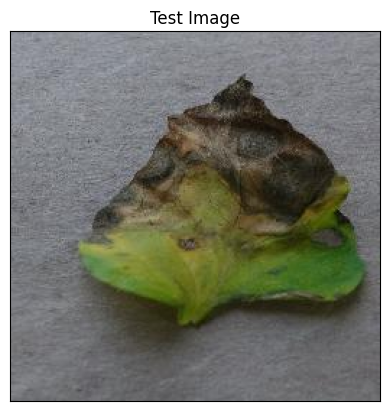

In [21]:


import cv2

# Ensure the correct image path
image_path = "test/test/TomatoEarlyBlight2.JPG"

# Reading Image
img = cv2.imread(image_path)
if img is None:
	raise FileNotFoundError(f"Image not found at the path: {image_path}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB

# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing Model

In [22]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [23]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 151ms/step


(array([[0.00756274, 0.02165764, 0.01579328, 0.00639765, 0.01486366,
         0.01282412, 0.03900053, 0.07193188, 0.01216242, 0.01053135,
         0.00809761, 0.00437536, 0.01077299, 0.01837063, 0.01021678,
         0.13126872, 0.02656686, 0.03419515, 0.02252959, 0.04183715,
         0.02448579, 0.02064382, 0.02725405, 0.02088287, 0.0017027 ,
         0.01404098, 0.03826161, 0.04270874, 0.010002  , 0.03384845,
         0.03329055, 0.01554719, 0.03158359, 0.05704448, 0.02415189,
         0.03496571, 0.03609399, 0.01253547]], dtype=float32),
 (1, 38))

In [24]:
result_index = np.argmax(prediction)
result_index

15

In [25]:
class_name = [
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

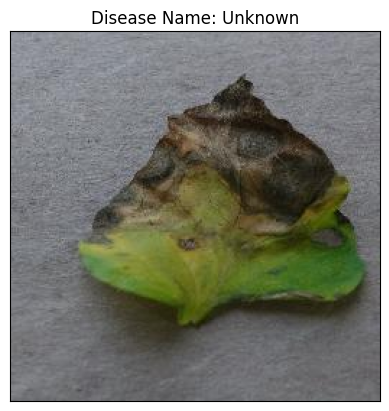

In [26]:
# Displaying Result of disease prediction
if result_index < len(class_name):
	model_prediction = class_name[result_index]
else:
	model_prediction = "Unknown"

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
model_prediction


'Unknown'